# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_ecom_2_6_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "df_ecom_KNN_final"

# DSLabs functions

In [2]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [3]:
%run "data_functions.py"


dslabs_functions lodaded
data_functions loaded


# Load

In [15]:

# test_data=True
test_data=True

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    df=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample
    df = df.groupby('day').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    test = test.groupby('day').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    train = train.groupby('day').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)

    # data=data.sample(frac=0.05, replace=False)
    # test=test.sample(frac=0.05, replace=False)
    # train=train.sample(frac=0.05, replace=False)
    
    
else:
    df=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # larger sample 10%
    # data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)

 
target='is_purchase'
target_metric='f2'
vars: list[str] = df.columns.to_list()
labels: list = list(df[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)
test.sort_values(by='day', inplace=True)
train.sort_values(by='day', inplace=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25835 entries, 0 to 25834
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code_lvl_1  25835 non-null  float64
 1   category_code_lvl_2  25835 non-null  float64
 2   price                25835 non-null  float64
 3   is_purchase          25835 non-null  int64  
 4   activity_in_session  25835 non-null  float64
 5   week_of_month        25835 non-null  int64  
 6   is_weekend           25835 non-null  int64  
 7   day                  25835 non-null  int64  
 8   brand_value          25835 non-null  float64
 9   product_category     25835 non-null  int64  
 10  time_of_day_sin      25835 non-null  float64
 11  time_of_day_cos      25835 non-null  float64
 12  day_of_week_sin      25835 non-null  float64
 13  day_of_week_cos      25835 non-null  float64
 14  hour_sin             25835 non-null  float64
 15  hour_cos             25835 non-null  floa

# Distribution Check

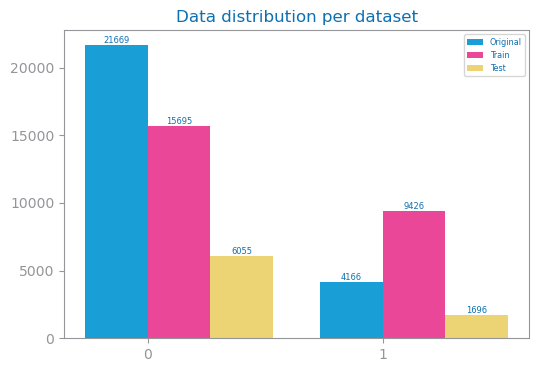

In [16]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(df[df[target] == 0]),  # Assuming 0 is the negative class
        len(df[df[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

# Model Evaluation

In [17]:
if evaluate==True:
    
    trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
    print(f'Train#={len(trnX)} Test#={len(tstX)}')
    print(f'Labels={labels}')

Train#=25121 Test#=7751
Labels=[0, 1]


## recall evaluation

KNN best with k=11 and euclidean


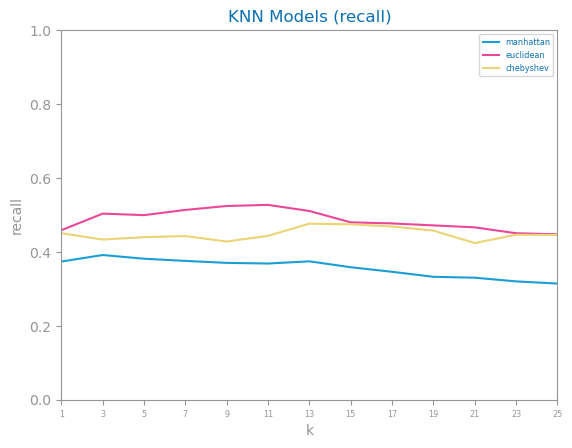

In [18]:
if evaluate==True:

    best_model_recall, recall_params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='recall')
    savefig(f'images/{file_tag}_knn_recall_study.png')
    show()

## evaluate precision

KNN best with k=13 and manhattan


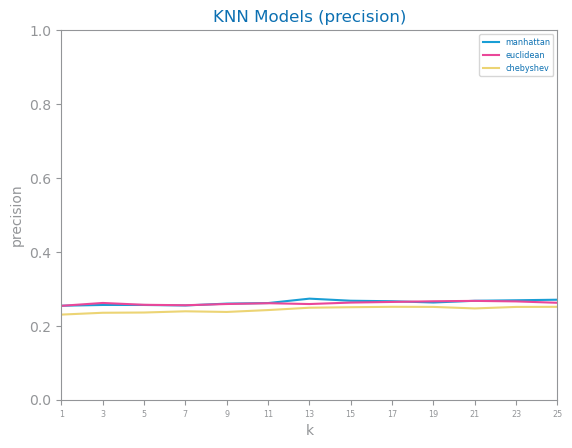

In [19]:
if evaluate==True:

    best_model_prec, prec_params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='precision')
    savefig(f'images/{file_tag}_knn_precision_study.png')
    show()

## evaluate f2

KNN best with k=11 and euclidean


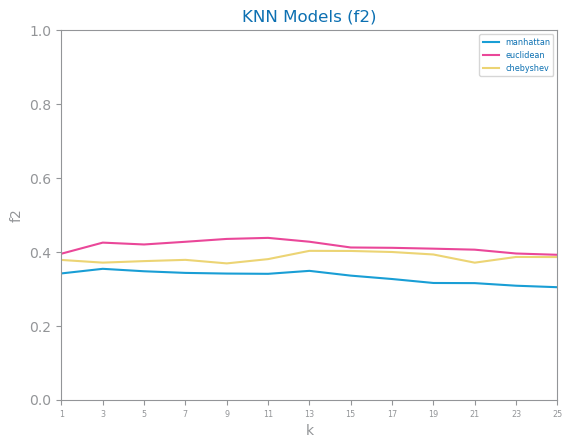

In [20]:
if evaluate==True:

    best_model_fl, fl_params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='f2')
    savefig(f'images/{file_tag}_knn_accuracy_study.png')
    show()

## Evaluate for best model

KNN best with k=5 and chebyshev


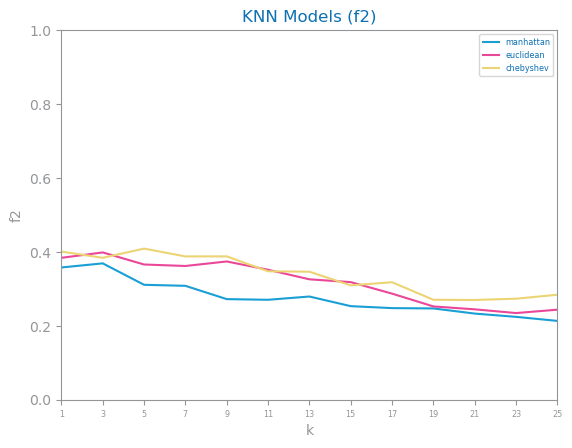

In [12]:
if evaluate==True:

    figure()


    best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=target_metric)
    savefig(f'images/{file_tag}_knn_{target_metric}_study.png')
    show()

# Best Model Performance

<Figure size 640x480 with 0 Axes>

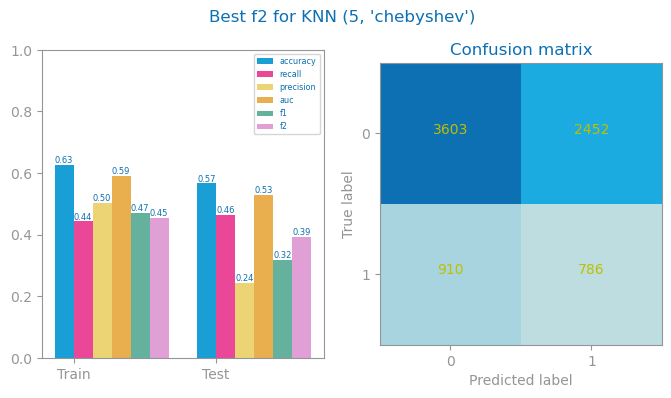

In [21]:
if evaluate == True:
    prd_trn: array = best_model.predict(trnX)
    prd_tst: array = best_model.predict(tstX)
    figure()
    plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
    savefig(f'images/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
    show()

# Overfitting

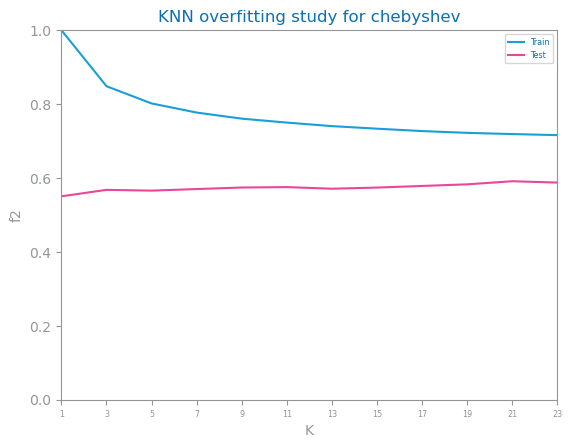

In [22]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(target_metric),
    percentage=True,
)
savefig(f"images/{file_tag}_knn_overfitting.png")
show()

# Additional evaluation

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1') # f2 not available
grid_search.fit(trnX, trnY)
best_knn = grid_search.best_estimator_

# Analysis

- Traffic source and medium with higher importance
- overfitting from level 3
